## Step 1: Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the dataset

In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3: Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# dropping column which is not required for our analysis
df.drop(columns={"CustomerID", "Gender"}, axis=1, inplace=True)

In [9]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step 4: EDA

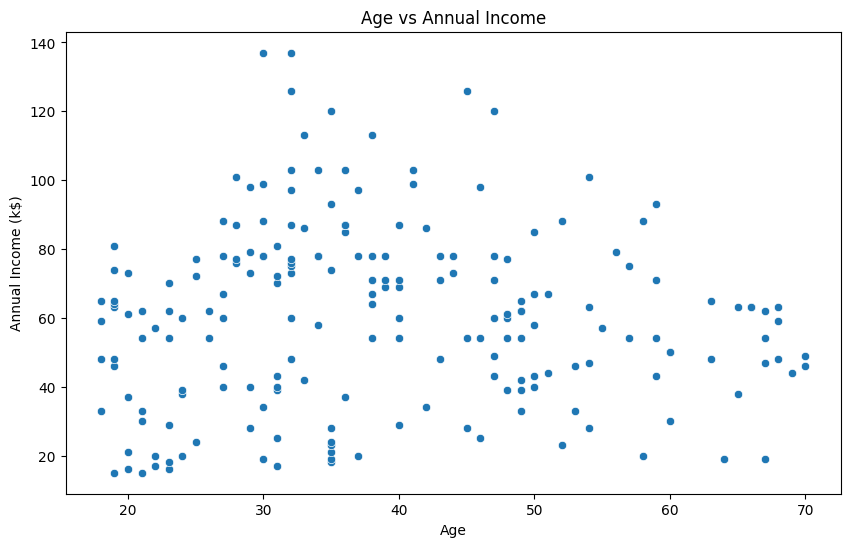

In [10]:
# display age and annual income scatter plot
plt.figure(figsize= (10,6))
sns. scatterplot(x="Age", y="Annual Income (k$)", data=df)
plt.title("Age vs Annual Income")
plt. xlabel("Age")
plt. ylabel("Annual Income (k$)")
plt.show()

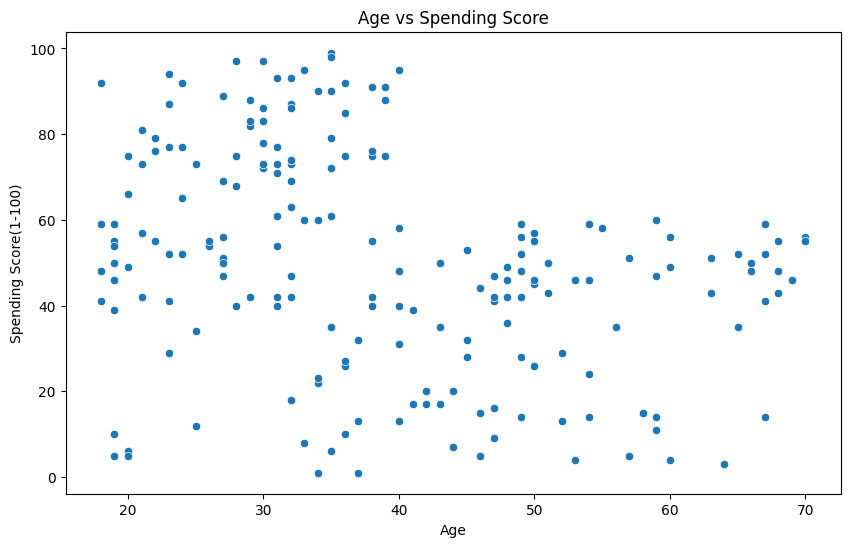

In [11]:
# display age and Spending score scatter plot
plt.figure(figsize= (10,6))
sns. scatterplot(x="Age", y="Spending Score (1-100)", data=df)
plt.title("Age vs Spending Score")
plt. xlabel("Age")
plt. ylabel("Spending Score(1-100)")
plt.show()

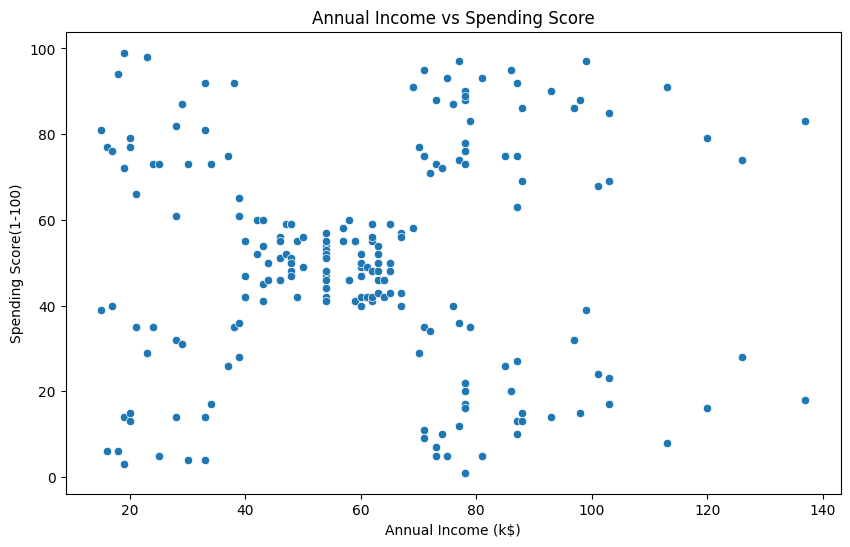

In [12]:
# display spending score and annual income scatter plot
plt.figure(figsize= (10,6))
sns. scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Annual Income vs Spending Score")
plt. xlabel("Annual Income (k$)")
plt. ylabel("Spending Score(1-100)")
plt.show()

## Step 5: Feature Engineering

In [13]:
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [14]:
# display skewness name normal, right skewed, left skewed
def skewness_name(skewness) :
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age:", skewness_name (df[ "Age"]. skew()))
print("Skewness of Annual Income: ",skewness_name (df["Annual Income (k$)"]. skew()))
print ("Skewness of Spending Score:", skewness_name(df["Spending Score (1-100)"].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income:  Right Skewed
Skewness of Spending Score: Left Skewed


In [15]:
#scalling the data
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler. fit_transform(df)
df = pd. DataFrame (scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 6: Train K-Mean model

In [16]:
# train kmeans clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


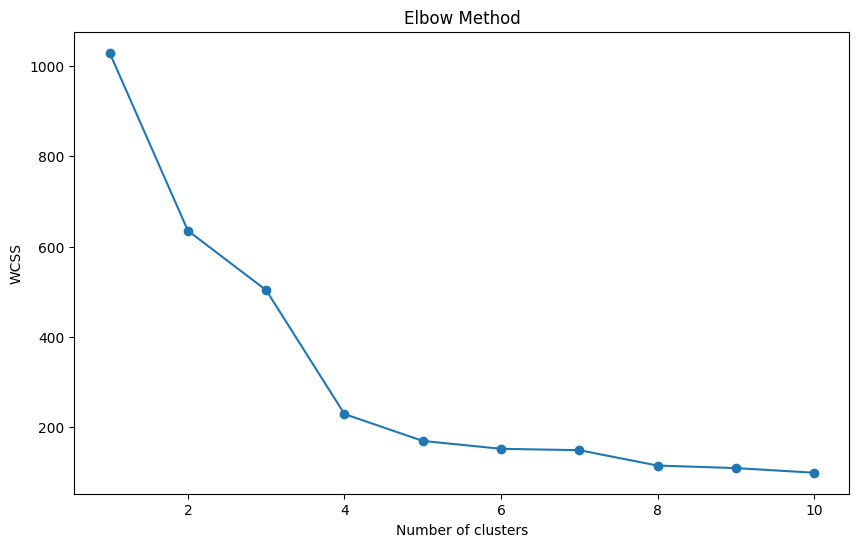

In [17]:
# check with ELBOW method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

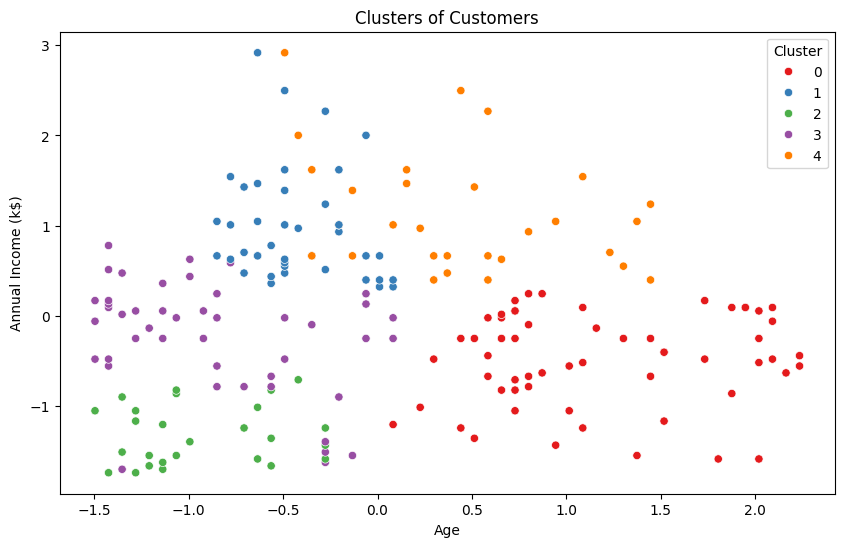

In [18]:
# display clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

Text(0, 0.5, 'Annual Income (k$) ')

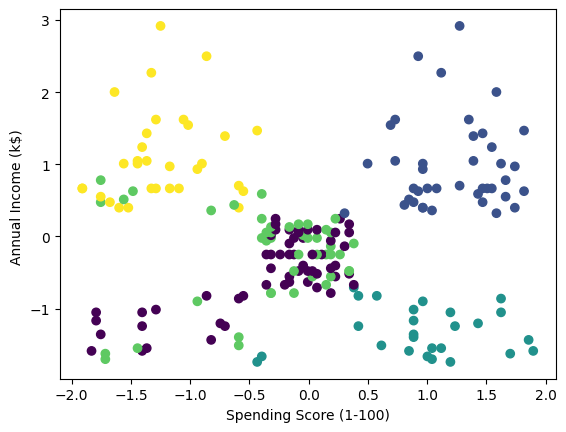

In [19]:
# display clusters
plt. scatter(df[ "Spending Score (1-100)"],
            df[ "Annual Income (k$)"],
            c = df[ "Cluster"])
plt.xlabel('Spending Score (1-100)') 
plt.ylabel ('Annual Income (k$) ')

In [20]:
# saved the file
df.to_csv("clustered_mall_customers.csv", index=False)

In [22]:
# dividing the data into features and target variable
x= df.drop (columns=("Cluster"), axis=0)
y = df["Cluster"]
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# train the model DT classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
# train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Cluster', axis=1)
y = df['Cluster']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Accuracy of Decision Tree Classifier:', accuracy_score(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.95


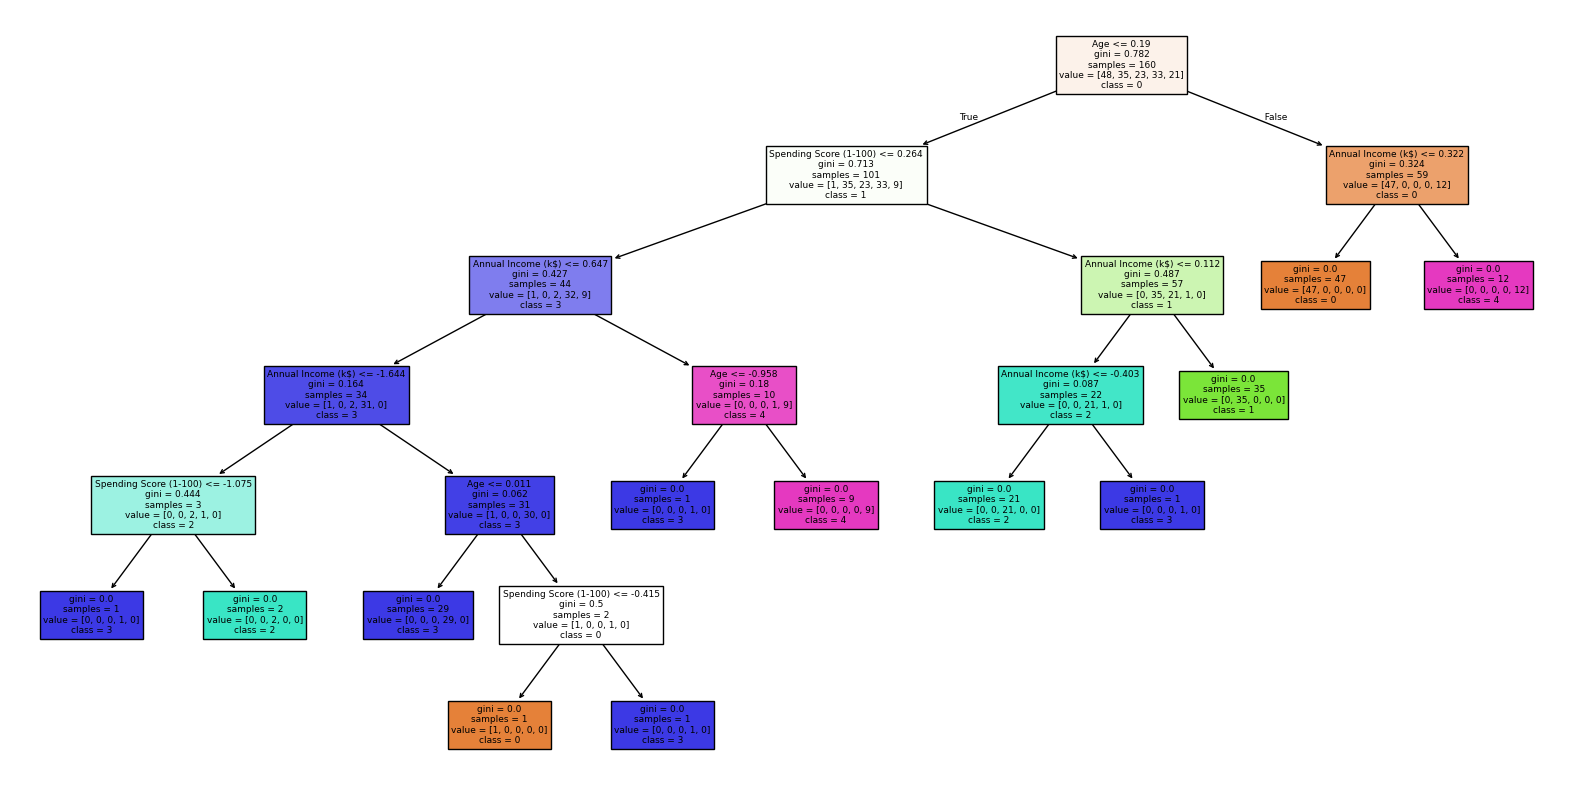

In [24]:
# graph the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=[str(i) for i in dtc.classes_])
plt.show()

In [25]:
# saves the model
import joblib
joblib.dump(dtc, "kmeans_model.pkl")

['kmeans_model.pkl']